In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sidetable

from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [17]:
df = pd.read_csv("data/tarjetaslimpio.csv", index_col = 0)
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,Non credit card accounts,Overdraft Protection,Credit Rating,Credt cards held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [18]:
df_numericas = df.select_dtypes(include=np.number)

In [19]:
columns = df_numericas.columns
columns

Index(['Non credit card accounts', 'Credt cards held', 'Homes Owned',
       'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')

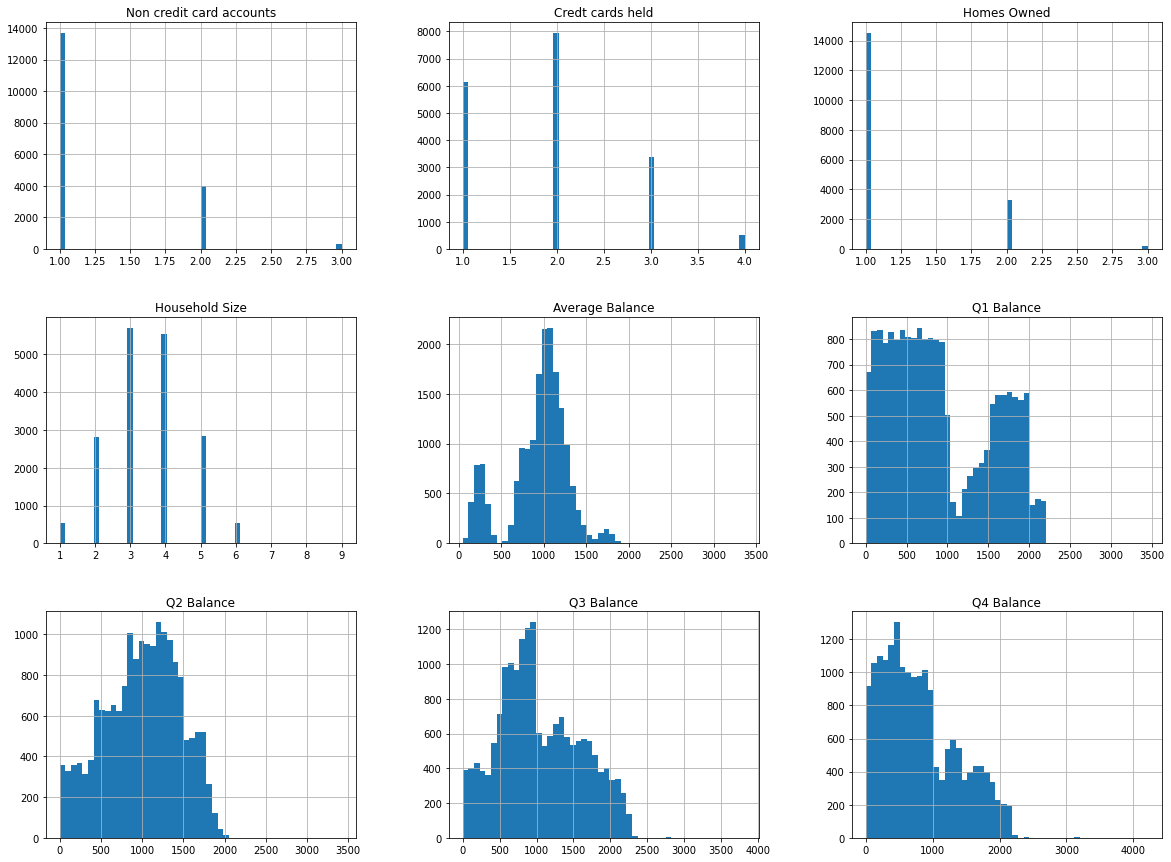

In [20]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

#### Correlación entre variables.

Como podemos observar, no existe una gran relación entre distintas variables para poder eliminar alguna de ellas.

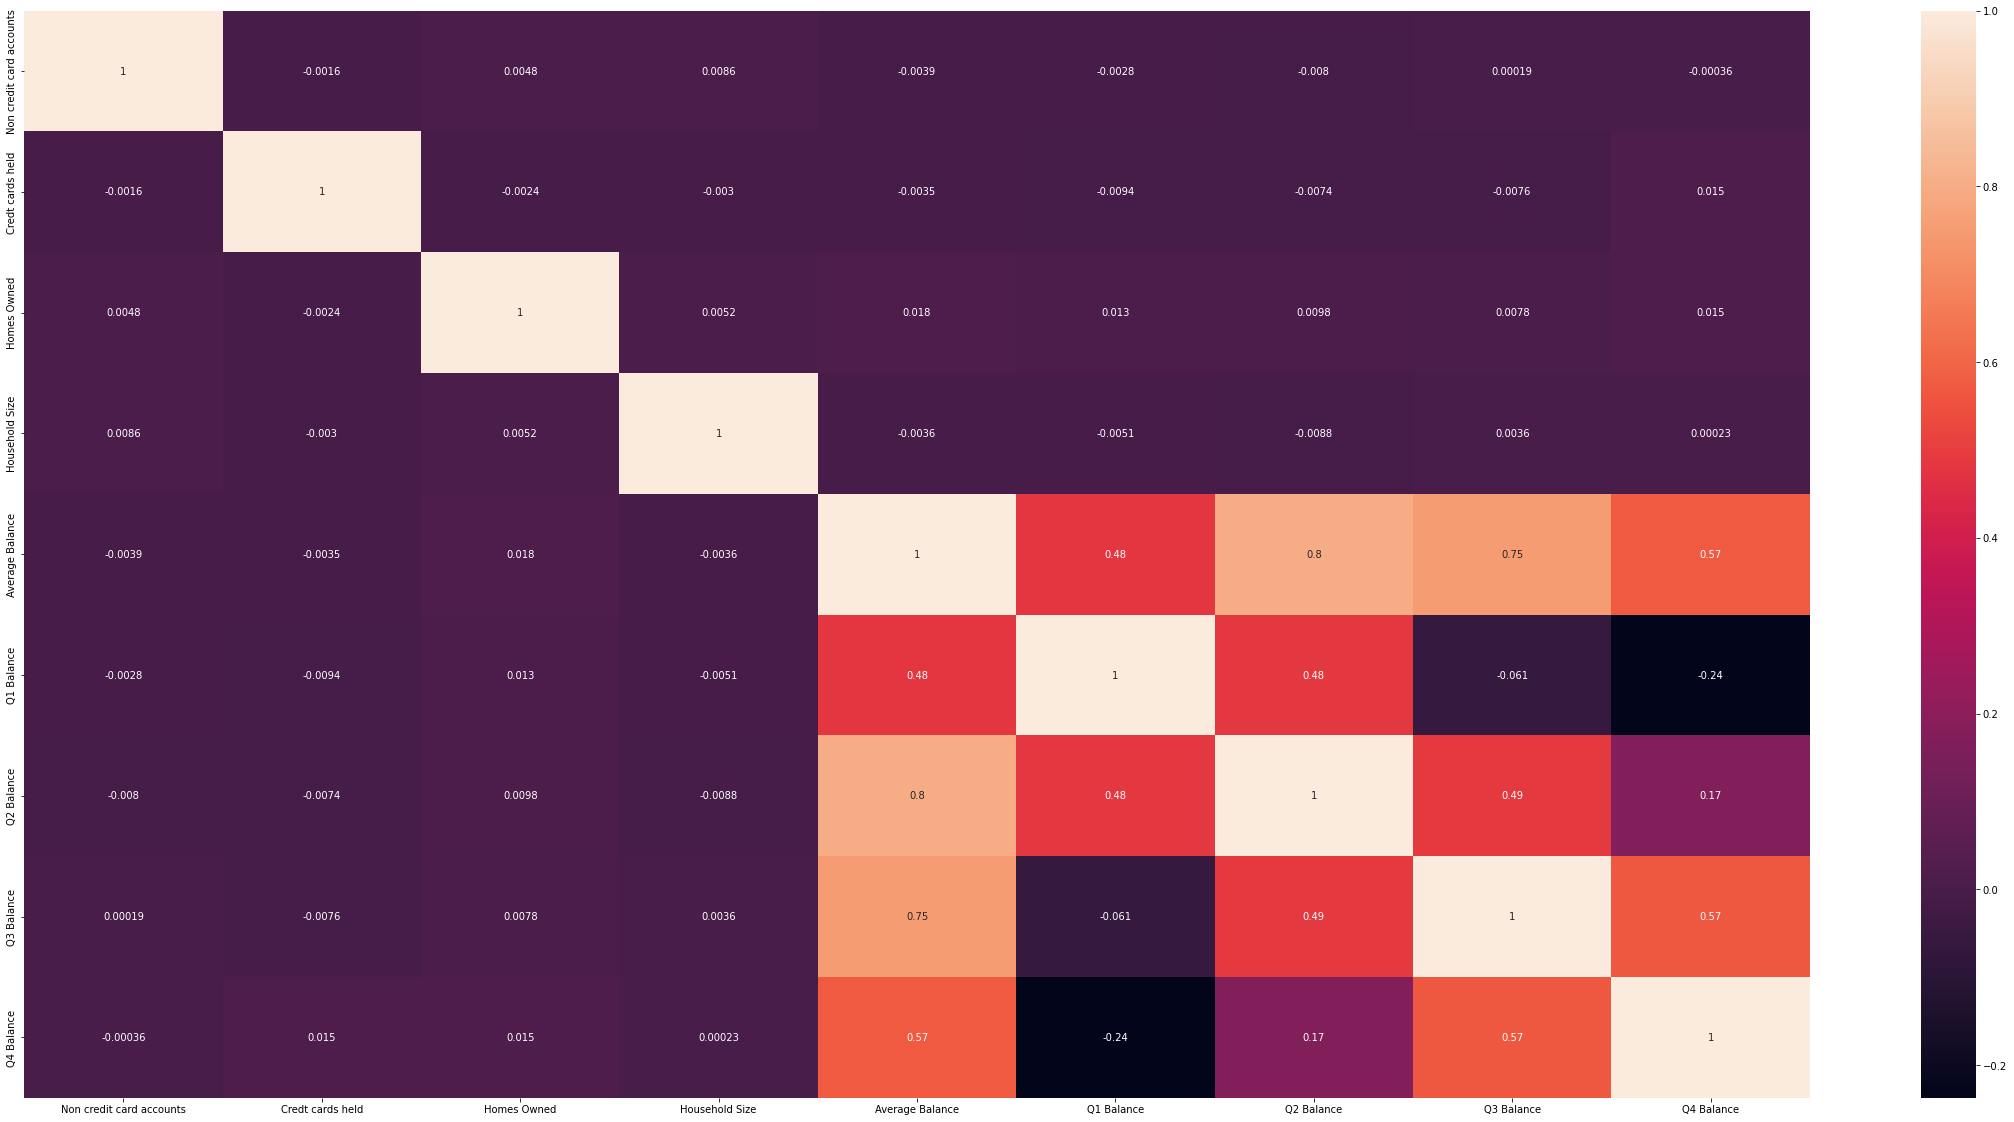

In [21]:
fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(df.corr(), annot = True)
plt.size = (40,40)
plt.show()

#### Gestión outliers.

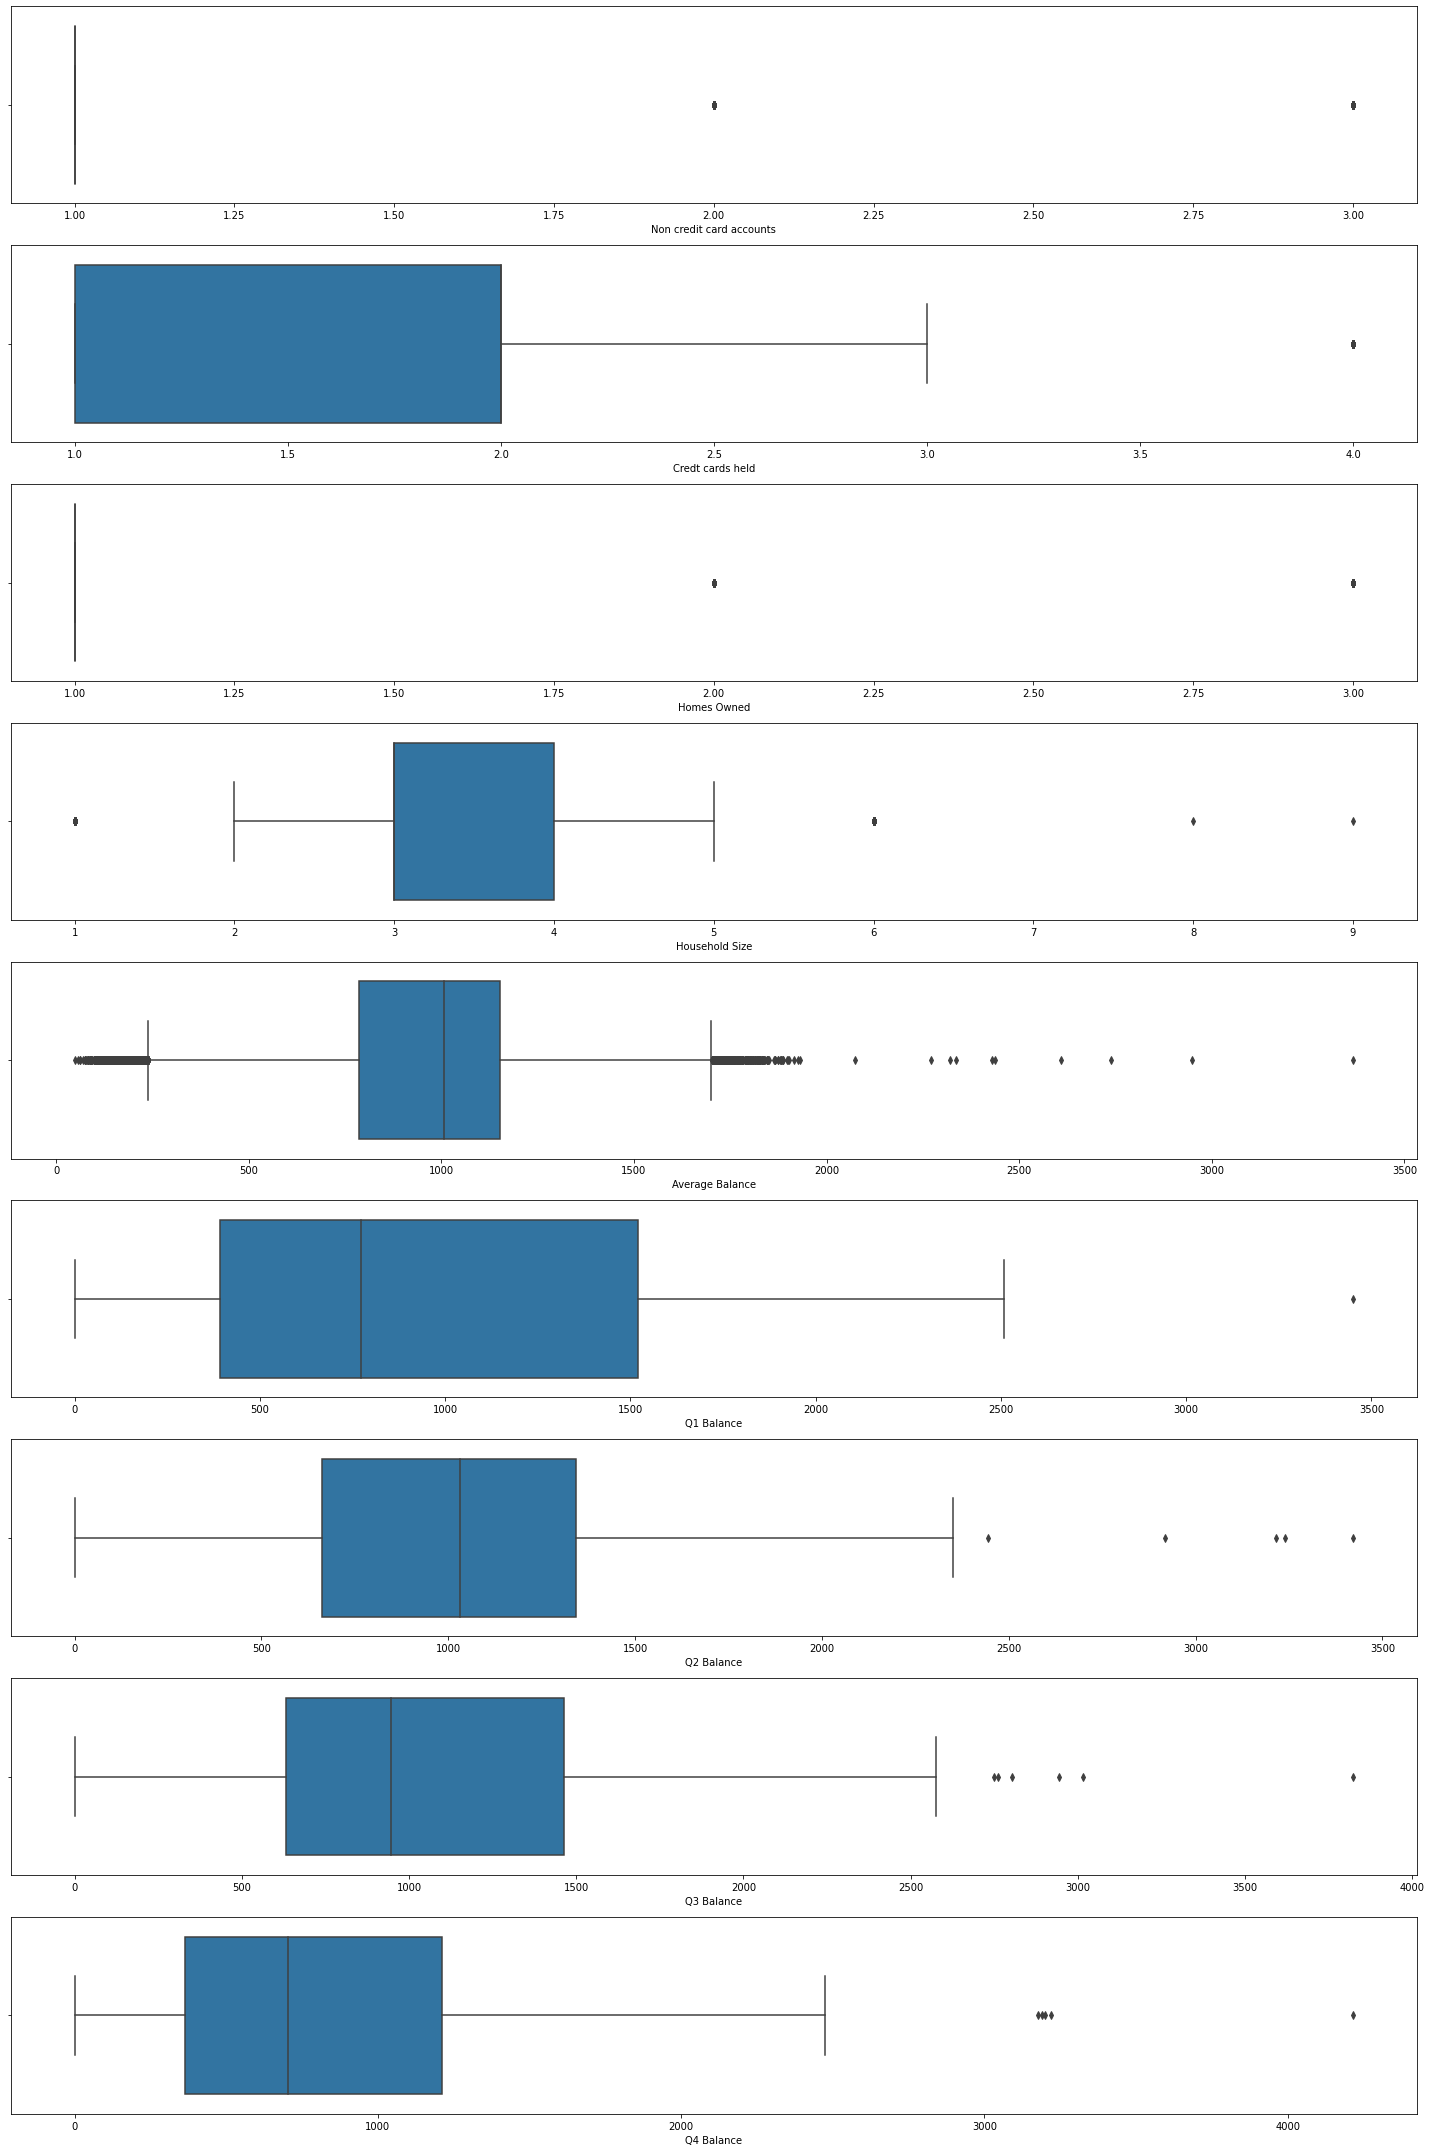

In [22]:
fig, ax = plt.subplots(9, 1, figsize=(20,30))

for i in range(len(df_numericas.select_dtypes(include = "number").columns)):
    sns.boxplot(x=df_numericas.select_dtypes(include = "number").columns[i], data=df_numericas, ax=ax[i])
    
plt.tight_layout()

plt.show()

In [23]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {}
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.4 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
        
    return dicc_indices 

In [24]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['Non credit card accounts', 'Credt cards held', 'Homes Owned',
       'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [25]:
outliers = detectar_outliers(lista_columnas, df)
print(outliers)

{'Non credit card accounts': [3, 4, 10, 15, 17, 18, 27, 32, 34, 37, 44, 50, 54, 61, 64, 69, 70, 72, 80, 84, 85, 87, 89, 90, 96, 98, 100, 104, 114, 116, 130, 132, 137, 140, 144, 145, 154, 155, 157, 159, 161, 162, 168, 180, 181, 182, 183, 186, 188, 195, 196, 197, 203, 206, 208, 209, 212, 216, 222, 233, 238, 242, 256, 261, 267, 273, 274, 278, 286, 288, 289, 292, 304, 306, 307, 309, 316, 317, 335, 336, 338, 341, 344, 348, 350, 351, 355, 359, 364, 367, 368, 369, 374, 375, 376, 382, 386, 389, 391, 398, 401, 409, 413, 414, 417, 418, 419, 420, 423, 424, 437, 440, 454, 462, 478, 479, 481, 487, 489, 490, 497, 498, 501, 502, 505, 508, 510, 513, 519, 521, 525, 528, 530, 534, 536, 539, 551, 557, 563, 564, 574, 577, 578, 583, 587, 589, 591, 592, 595, 596, 606, 612, 613, 617, 618, 621, 624, 628, 632, 633, 634, 640, 641, 642, 643, 644, 647, 648, 649, 650, 657, 660, 661, 669, 679, 685, 696, 697, 698, 715, 722, 727, 729, 734, 735, 736, 744, 749, 750, 751, 752, 755, 756, 758, 770, 773, 776, 779, 783, 792

In [26]:
for i, k in outliers.items():
    print(i, len(k))

Non credit card accounts 4302
Credt cards held 515
Homes Owned 3474
Household Size 1079
Average Balance 1969
Q1 Balance 1
Q2 Balance 6
Q3 Balance 6
Q4 Balance 7


In [27]:
for k, v in outliers.items():
    if k == "bmi":
        media = df[k].mean()
        for i in v:
            df.loc[i,k] = media 
        mediana = df[k].median() 
        for i in v: 
            df.loc[i,k] = mediana 

Sin embargo, observando el diagrama mostrado con anterioridad podemos observar que ciertas columnas no son necesarias.

In [28]:
df = df.drop(['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'] , axis = 1)

In [29]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,Non credit card accounts,Overdraft Protection,Credit Rating,Credt cards held,Homes Owned,Household Size,Own Your Home,Average Balance
Customer Number,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


In [30]:
df.to_csv('data/dflimpio.csv')